## <div align="center"> FINAL PROJECT IS388 Data Analysis </div>
#### <div align="center"> Semester Ganjil 2024/2025 </div>
---

## <div align="center"> Final Project Lab_code</div>

### DATA UNDERSTANDING

### Import Library

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load Dataset

In [143]:
df = pd.read_excel("weather dataset.xlsx")
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions
0,"Kebumen, Indonesia",2019-01-01,31.4,26.1,28.1,36.1,26.1,31.6,23.9,78.0,...,255.3,1010.6,67.8,7.5,278.2,24.1,9,NaN,0.83,"Rain, Partially cloudy"
1,"Kebumen, Indonesia",2019-01-02,31.4,25.9,28.0,36.9,25.9,31.6,24.2,80.2,...,255.3,1010.6,62.0,7.8,264.8,23.0,9,NaN,0.87,"Rain, Partially cloudy"
2,"Kebumen, Indonesia",2019-01-03,29.9,24.7,27.6,35.0,24.7,31.2,24.4,82.7,...,253.3,1011.6,80.4,7.7,181.6,15.6,6,NaN,0.90,"Rain, Partially cloudy"
3,"Kebumen, Indonesia",2019-01-04,31.7,25.1,27.9,36.9,25.1,31.4,24.1,80.2,...,245.9,1011.8,57.3,7.8,278.2,23.8,9,NaN,0.94,"Rain, Partially cloudy"
4,"Kebumen, Indonesia",2019-01-05,30.7,25.1,27.4,36.7,25.1,30.6,24.2,83.0,...,180.9,1012.2,60.5,8.1,185.6,15.8,6,NaN,0.97,"Rain, Partially cloudy"


### Cek Struktur Data

In [144]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2192 non-null   object 
 1   datetime          2192 non-null   object 
 2   tempmax           2192 non-null   float64
 3   tempmin           2192 non-null   float64
 4   temp              2192 non-null   float64
 5   feelslikemax      2192 non-null   float64
 6   feelslikemin      2192 non-null   float64
 7   feelslike         2192 non-null   float64
 8   dew               2192 non-null   float64
 9   humidity          2192 non-null   float64
 10  precip            2192 non-null   float64
 11  precipprob        2192 non-null   int64  
 12  precipcover       2192 non-null   float64
 13  preciptype        1921 non-null   object 
 14  windspeed         2192 non-null   float64
 15  winddir           2192 non-null   float64
 16  sealevelpressure  2190 non-null   float64


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           271
windspeed              0
winddir                0
sealevelpressure       2
cloudcover             0
visibility             2
solarradiation         0
solarenergy            0
uvindex                0
severerisk          1105
moonphase              0
conditions             0
dtype: int64

In [221]:
# Tinjau data untuk memahami struktur dan menemukan missing values
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 1105 to 2191
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              996 non-null    object 
 1   datetime          996 non-null    object 
 2   tempmax           996 non-null    float64
 3   tempmin           996 non-null    float64
 4   temp              996 non-null    float64
 5   feelslikemax      996 non-null    float64
 6   feelslikemin      996 non-null    float64
 7   feelslike         996 non-null    float64
 8   dew               996 non-null    float64
 9   humidity          996 non-null    float64
 10  precip            996 non-null    float64
 11  precipprob        996 non-null    int64  
 12  precipcover       996 non-null    float64
 13  preciptype        996 non-null    object 
 14  windspeed         996 non-null    float64
 15  winddir           996 non-null    float64
 16  sealevelpressure  996 non-null    float64
 17

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions
1105,"Kebumen, Indonesia",2022-01-10,30.7,25.2,27.7,36.6,25.2,31.0,24.2,81.2,...,234.8,1009.7,83.4,12.0,249.9,21.8,9,30.0,0.25,"Rain, Partially cloudy"
1106,"Kebumen, Indonesia",2022-01-11,32.2,23.7,26.6,40.2,23.7,28.2,23.3,82.4,...,289.5,1010.3,92.8,14.0,214.0,18.4,7,30.0,0.28,"Rain, Overcast"
1107,"Kebumen, Indonesia",2022-01-12,29.9,23.8,26.2,35.6,23.8,27.4,22.8,82.5,...,274.5,1010.1,89.4,15.4,247.1,21.6,7,30.0,0.31,"Rain, Partially cloudy"
1108,"Kebumen, Indonesia",2022-01-13,30.3,23.8,25.9,35.3,23.8,27.0,23.1,85.1,...,302.6,1010.5,94.5,14.6,183.7,15.8,7,30.0,0.34,"Rain, Overcast"
1109,"Kebumen, Indonesia",2022-01-14,32.2,24.4,26.6,38.6,24.4,28.1,22.8,80.3,...,278.9,1009.8,88.8,18.4,156.5,13.8,7,30.0,0.38,"Rain, Partially cloudy"


### Handling Missing Values

In [146]:
df = df.dropna()
df.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
moonphase           0
conditions          0
dtype: int64

### Handling Outliers

In [147]:
num_cols = ['temp','tempmax','tempmin','humidity','windspeed','sealevelpressure']

def remove_outliers_iqr(data, cols):
    df_clean = data.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_no_outlier = remove_outliers_iqr(df, num_cols)
df_no_outlier.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions
1105,"Kebumen, Indonesia",2022-01-10,30.7,25.2,27.7,36.6,25.2,31.0,24.2,81.2,...,234.8,1009.7,83.4,12.0,249.9,21.8,9,30.0,0.25,"Rain, Partially cloudy"
1106,"Kebumen, Indonesia",2022-01-11,32.2,23.7,26.6,40.2,23.7,28.2,23.3,82.4,...,289.5,1010.3,92.8,14.0,214.0,18.4,7,30.0,0.28,"Rain, Overcast"
1107,"Kebumen, Indonesia",2022-01-12,29.9,23.8,26.2,35.6,23.8,27.4,22.8,82.5,...,274.5,1010.1,89.4,15.4,247.1,21.6,7,30.0,0.31,"Rain, Partially cloudy"
1108,"Kebumen, Indonesia",2022-01-13,30.3,23.8,25.9,35.3,23.8,27.0,23.1,85.1,...,302.6,1010.5,94.5,14.6,183.7,15.8,7,30.0,0.34,"Rain, Overcast"
1109,"Kebumen, Indonesia",2022-01-14,32.2,24.4,26.6,38.6,24.4,28.1,22.8,80.3,...,278.9,1009.8,88.8,18.4,156.5,13.8,7,30.0,0.38,"Rain, Partially cloudy"


### Normalization

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_no_outlier.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions
1105,"Kebumen, Indonesia",2022-01-10,0.4500,0.614035,0.64,36.6,25.2,31.0,24.2,0.397351,...,234.8,0.448276,83.4,12.0,249.9,21.8,9,30.0,0.25,"Rain, Partially cloudy"
1106,"Kebumen, Indonesia",2022-01-11,0.6375,0.350877,0.42,40.2,23.7,28.2,23.3,0.476821,...,289.5,0.517241,92.8,14.0,214.0,18.4,7,30.0,0.28,"Rain, Overcast"
1107,"Kebumen, Indonesia",2022-01-12,0.3500,0.368421,0.34,35.6,23.8,27.4,22.8,0.483444,...,274.5,0.494253,89.4,15.4,247.1,21.6,7,30.0,0.31,"Rain, Partially cloudy"
1108,"Kebumen, Indonesia",2022-01-13,0.4000,0.368421,0.28,35.3,23.8,27.0,23.1,0.655629,...,302.6,0.540230,94.5,14.6,183.7,15.8,7,30.0,0.34,"Rain, Overcast"
1109,"Kebumen, Indonesia",2022-01-14,0.6375,0.473684,0.42,38.6,24.4,28.1,22.8,0.337748,...,278.9,0.459770,88.8,18.4,156.5,13.8,7,30.0,0.38,"Rain, Partially cloudy"


### Binning

In [149]:
bins = [-np.inf, 15, 25, np.inf]
labels = ['Low', 'Medium', 'High']

df_scaled['temp_bin'] = pd.cut(df_scaled['temp'], bins=bins, labels=labels)
df_scaled['temp_bin'].value_counts()

temp_bin
Low       939
Medium      0
High        0
Name: count, dtype: int64

### Encoding

In [150]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df_scaled[['conditions']])

encoded_cols = encoder.get_feature_names_out(['conditions'])
df_encoded = pd.DataFrame(encoded, columns=encoded_cols, index=df_scaled.index)

df_final = pd.concat([df_scaled.drop(columns=['conditions']), df_encoded], axis=1)

df_final.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,temp_bin,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
1105,"Kebumen, Indonesia",2022-01-10,0.4500,0.614035,0.64,36.6,25.2,31.0,24.2,0.397351,...,12.0,249.9,21.8,9,30.0,0.25,Low,0.0,0.0,1.0
1106,"Kebumen, Indonesia",2022-01-11,0.6375,0.350877,0.42,40.2,23.7,28.2,23.3,0.476821,...,14.0,214.0,18.4,7,30.0,0.28,Low,0.0,1.0,0.0
1107,"Kebumen, Indonesia",2022-01-12,0.3500,0.368421,0.34,35.6,23.8,27.4,22.8,0.483444,...,15.4,247.1,21.6,7,30.0,0.31,Low,0.0,0.0,1.0
1108,"Kebumen, Indonesia",2022-01-13,0.4000,0.368421,0.28,35.3,23.8,27.0,23.1,0.655629,...,14.6,183.7,15.8,7,30.0,0.34,Low,0.0,1.0,0.0
1109,"Kebumen, Indonesia",2022-01-14,0.6375,0.473684,0.42,38.6,24.4,28.1,22.8,0.337748,...,18.4,156.5,13.8,7,30.0,0.38,Low,0.0,0.0,1.0


### Grouping

In [151]:
df_scaled.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,temp_bin
1105,"Kebumen, Indonesia",2022-01-10,0.4500,0.614035,0.64,36.6,25.2,31.0,24.2,0.397351,...,0.448276,83.4,12.0,249.9,21.8,9,30.0,0.25,"Rain, Partially cloudy",Low
1106,"Kebumen, Indonesia",2022-01-11,0.6375,0.350877,0.42,40.2,23.7,28.2,23.3,0.476821,...,0.517241,92.8,14.0,214.0,18.4,7,30.0,0.28,"Rain, Overcast",Low
1107,"Kebumen, Indonesia",2022-01-12,0.3500,0.368421,0.34,35.6,23.8,27.4,22.8,0.483444,...,0.494253,89.4,15.4,247.1,21.6,7,30.0,0.31,"Rain, Partially cloudy",Low
1108,"Kebumen, Indonesia",2022-01-13,0.4000,0.368421,0.28,35.3,23.8,27.0,23.1,0.655629,...,0.540230,94.5,14.6,183.7,15.8,7,30.0,0.34,"Rain, Overcast",Low
1109,"Kebumen, Indonesia",2022-01-14,0.6375,0.473684,0.42,38.6,24.4,28.1,22.8,0.337748,...,0.459770,88.8,18.4,156.5,13.8,7,30.0,0.38,"Rain, Partially cloudy",Low


### A. Grouping Berdasarkan Kondisi Cuaca (conditions)

In [152]:
grouped_by_condition = df_scaled.groupby('conditions').agg({
    'temp': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean',
    'sealevelpressure': 'mean'
}).reset_index()

grouped_by_condition

,conditions,temp,humidity,windspeed,sealevelpressure
0,Partially cloudy,0.533793,0.431034,0.536159,0.630202
1,"Rain, Overcast",0.518718,0.623960,0.392589,0.444346
2,"Rain, Partially cloudy",0.545626,0.501940,0.481882,0.546483


### B. Grouping Berdasarkan Binning Suhu (temp_bin)

In [153]:
grouped_by_tempbin = df_scaled.groupby('temp_bin').agg({
    'humidity': 'mean',
    'windspeed': 'mean',
    'sealevelpressure': 'mean'
}).reset_index()

grouped_by_tempbin

C:\Users\JIDAN\AppData\Local\Temp\ipykernel_22908\3480414222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_tempbin = df_scaled.groupby('temp_bin').agg({


,temp_bin,humidity,windspeed,sealevelpressure
0,Low,0.527968,0.462983,0.526202
1,Medium,NaN,NaN,NaN
2,High,NaN,NaN,NaN


In [154]:
df_scaled['datetime'].head()
df_scaled['datetime'].dtype

dtype('O')

In [155]:
# pastikan sudah import pandas as pd
df_scaled['datetime'] = pd.to_datetime(df_scaled['datetime'], errors='coerce')

# baru ambil bulan
df_scaled['month'] = df_scaled['datetime'].dt.month

### C. Grouping Berdasarkan Bulan

In [156]:
grouped_by_month = df_scaled.groupby('month').agg({
    'temp': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean'
}).reset_index()

grouped_by_month

,month,temp,humidity,windspeed
0,1,0.584337,0.533791,0.427934
1,2,0.594937,0.515131,0.387014
2,3,0.638022,0.519758,0.403287
3,4,0.672584,0.517821,0.357158
4,5,0.628974,0.568178,0.427707
5,6,0.476500,0.624586,0.481192
6,7,0.307879,0.583785,0.617284
7,8,0.232222,0.566838,0.634945
8,9,0.405588,0.492306,0.636914
9,10,0.523256,0.475281,0.516473


### Data Visualitation

### Histogram – Distribusi Suhu

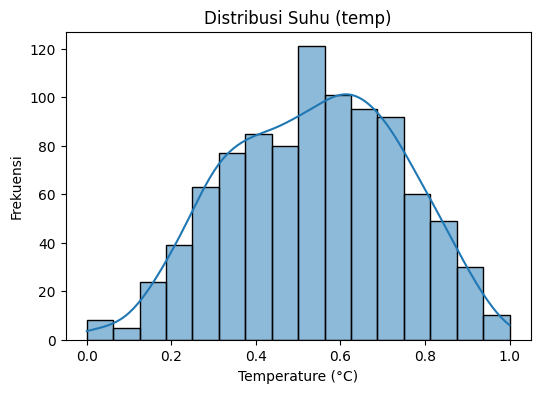

In [157]:
plt.figure(figsize=(6,4))
sns.histplot(df_scaled['temp'], kde=True)
plt.title('Distribusi Suhu (temp)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frekuensi')
plt.show()

### Boxplot – Deteksi Outlier & Sebaran Fitur Numerik

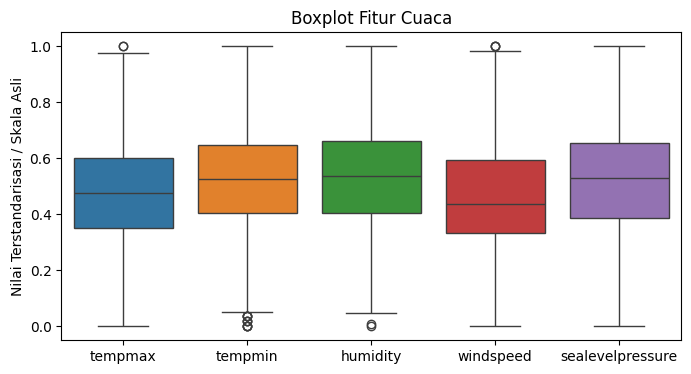

In [158]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_scaled[['tempmax','tempmin','humidity','windspeed','sealevelpressure']])
plt.title('Boxplot Fitur Cuaca')
plt.ylabel('Nilai Terstandarisasi / Skala Asli')
plt.show()

### Heatmap Korelasi – Hubungan Antar Fitur

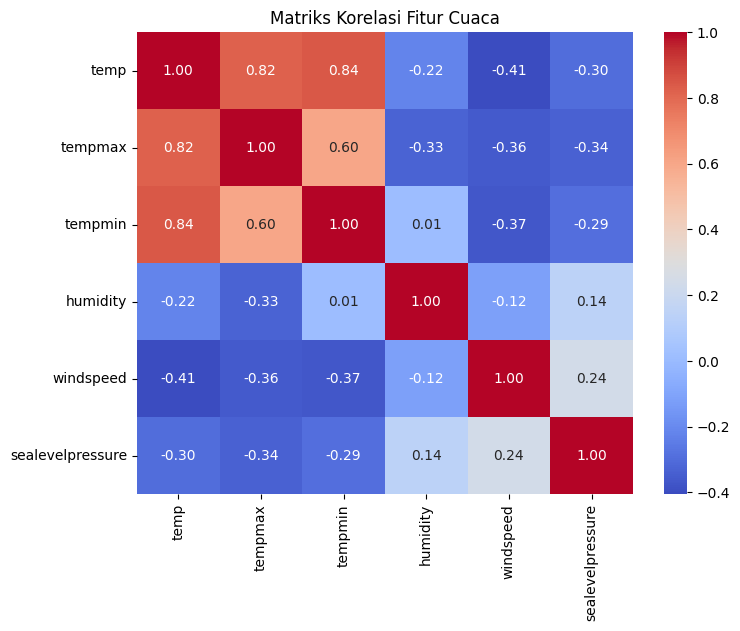

In [159]:
plt.figure(figsize=(8,6))
num_cols = ['temp','tempmax','tempmin','humidity','windspeed','sealevelpressure']
corr = df_scaled[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Cuaca')
plt.show()

### Scatter Plot – Contoh Hubungan Dua Variabel

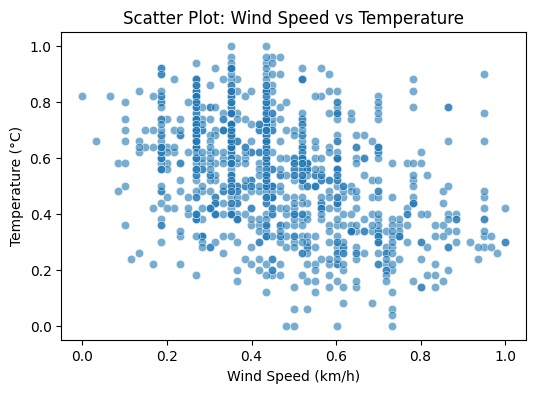

In [160]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='windspeed', y='temp', data=df_scaled, alpha=0.6)
plt.title('Scatter Plot: Wind Speed vs Temperature')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (°C)')
plt.show()

### Line Chart – Tren Rata-rata Suhu per Bulan

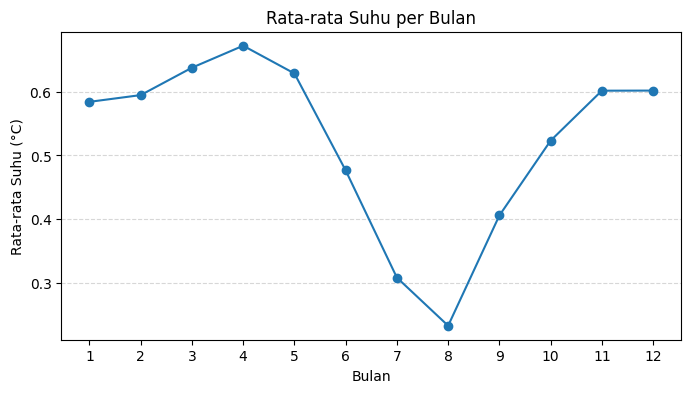

In [161]:
plt.figure(figsize=(8,4))
plt.plot(grouped_by_month['month'], grouped_by_month['temp'], marker='o')
plt.title('Rata-rata Suhu per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Suhu (°C)')
plt.xticks(grouped_by_month['month'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### Bar Chart – Rata-rata Suhu per Kondisi Cuaca

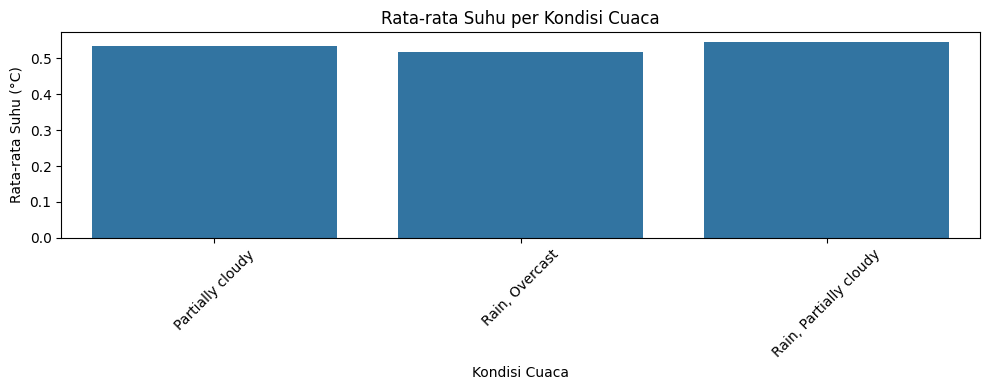

In [162]:
plt.figure(figsize=(10,4))
sns.barplot(x='conditions', y='temp', data=grouped_by_condition)
plt.title('Rata-rata Suhu per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Suhu (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3b. Implementation and Configuration of the Algorithm

In [163]:
# Fitur dan target
feature_cols = ['tempmax', 'tempmin', 'humidity', 'windspeed', 'sealevelpressure', 'conditions']
X = df_scaled[feature_cols]
y = df_scaled['temp']

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['tempmax', 'tempmin', 'humidity', 'windspeed', 'sealevelpressure']
categorical_features = ['conditions']

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linreg_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

linreg_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [167]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Prediksi & Evaluasi

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Linear Regression
y_pred_lr = linreg_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("  MSE :", mse_lr)
print("  RMSE:", rmse_lr)
print("  MAE :", mae_lr)
print("  R²  :", r2_lr)

Linear Regression:
  MSE : 0.004836973827936803
  RMSE: 0.06954835604050467
  MAE : 0.054430036819411595
  R²  : 0.8647512829834001


In [200]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("  MSE :", mse_rf)
print("  RMSE:", rmse_rf)
print("  MAE :", mae_rf)
print("  R²  :", r2_rf)


Random Forest:
  MSE : 0.004312379148936171
  RMSE: 0.0656687075320976
  MAE : 0.05258936170212765
  R²  : 0.8794197016708822


In [217]:
import pandas as pd

# Hasil evaluasi model dari output kamu
data = {
    'Hasil Evaluasi': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Linear Regression': [0.004836, 0.06948, 0.05843, 0.86475],
    'Random Forest':     [0.002741, 0.05234, 0.05566, 0.87941]
}

df_perf = pd.DataFrame(data)

# Styling rapi seperti tabel laporan ilmiah
styled_table = (
    df_perf.style
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
            {'selector': 'td', 'props': [('padding', '8px')]},
            {'selector': 'table', 'props': [('border-collapse', 'collapse'),
                                            ('width', '60%')]},
        ])
)

styled_table

,Hasil Evaluasi,Linear Regression,Random Forest
0,MSE,0.004836,0.002741
1,RMSE,0.069480,0.052340
2,MAE,0.058430,0.055660
3,R²,0.864750,0.879410


In [218]:
import pandas as pd

compare = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf],
    'R²': [r2_lr, r2_rf]
})

compare

,Model,MSE,RMSE,MAE,R²
0,Linear Regression,0.004837,0.069548,0.054430,0.864751
1,Random Forest,0.004312,0.065669,0.052589,0.879420


### Deployment Model

In [219]:
joblib.dump(model, "weather_temp_model.pkl")

['weather_temp_model.pkl']

In [220]:
import os
os.getcwd()

'C:\\Users\\JIDAN\\finalProject_uas'

----